In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#get data from
!wget https://www.dropbox.com/scl/fi/20yg7wsxbjw3hx7imlo3c/archive-1.zip?rlkey=qgfy9v3xb8ipo5hn89v6v5uu2&st=idqsqpd2&dl=0

--2024-10-26 11:15:31--  https://www.dropbox.com/scl/fi/20yg7wsxbjw3hx7imlo3c/archive-1.zip?rlkey=qgfy9v3xb8ipo5hn89v6v5uu2
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uca93846bad6ffafa000a3229465.dl.dropboxusercontent.com/cd/0/inline/CdJCXvnFlJS2p_ligHraLkRLEYrJKr50ofrJbrIQKjhDdLzv-NkOvAHBMu7h1BsxdtbMTyxIjOjnGxMkbycBsdlp6fmDuAspHIWvBFrYUvKc2GqZSNhO-E1Ym5rGrMHukrMP43e1DO1NAFNWU8MsvRRK/file# [following]
--2024-10-26 11:15:32--  https://uca93846bad6ffafa000a3229465.dl.dropboxusercontent.com/cd/0/inline/CdJCXvnFlJS2p_ligHraLkRLEYrJKr50ofrJbrIQKjhDdLzv-NkOvAHBMu7h1BsxdtbMTyxIjOjnGxMkbycBsdlp6fmDuAspHIWvBFrYUvKc2GqZSNhO-E1Ym5rGrMHukrMP43e1DO1NAFNWU8MsvRRK/file
Resolving uca93846bad6ffafa000a3229465.dl.dropboxusercontent.com (uca93846bad6ffafa000a3229465.dl.dropboxusercontent.com)... 162.125.65.15, 2620

In [4]:
!unzip /content/archive-1.zip?rlkey=qgfy9v3xb8ipo5hn89v6v5uu2

Archive:  /content/archive-1.zip?rlkey=qgfy9v3xb8ipo5hn89v6v5uu2
  inflating: brain_tumor_dataset/no/1 no.jpeg  
  inflating: brain_tumor_dataset/no/10 no.jpg  
  inflating: brain_tumor_dataset/no/11 no.jpg  
  inflating: brain_tumor_dataset/no/12 no.jpg  
  inflating: brain_tumor_dataset/no/13 no.jpg  
  inflating: brain_tumor_dataset/no/14 no.jpg  
  inflating: brain_tumor_dataset/no/15 no.jpg  
  inflating: brain_tumor_dataset/no/17 no.jpg  
  inflating: brain_tumor_dataset/no/18 no.jpg  
  inflating: brain_tumor_dataset/no/19 no.jpg  
  inflating: brain_tumor_dataset/no/2 no.jpeg  
  inflating: brain_tumor_dataset/no/20 no.jpg  
  inflating: brain_tumor_dataset/no/21 no.jpg  
  inflating: brain_tumor_dataset/no/22 no.jpg  
  inflating: brain_tumor_dataset/no/23 no.jpg  
  inflating: brain_tumor_dataset/no/24 no.jpg  
  inflating: brain_tumor_dataset/no/25 no.jpg  
  inflating: brain_tumor_dataset/no/26 no.jpg  
  inflating: brain_tumor_dataset/no/27 no.jpg  
  inflating: brain_tumo

In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import math
import shutil
import glob

In [6]:
#count the number of images in the respective classes 0-Brain Tumor 1- Healthy
ROOT_DIR="/content/brain_tumor_dataset"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))

number_of_images.items()


dict_items([('no', 98), ('yes', 155)])

In [7]:
os.listdir("/content/brain_tumor_dataset")

['no', 'yes']

In [8]:
len(os.listdir("/content/brain_tumor_dataset"))

2



# we will split the data such that
* 70% for Train Data
* 15% for Validation Data
* 15% for Test Data



In [11]:
# we will create a train folder


if not os.path.exists("./train"):
  os.mkdir("./train")

  for dir in os.listdir(ROOT_DIR):
    os.makedirs("./train/"+dir)

    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),size=(math.floor(70/100*number_of_images[dir])-5),
                                replace=False):
      O=os.path.join(ROOT_DIR,dir,img) #path
      D=os.path.join("./train",dir)
      shutil.copy(O,D)
      #os.remove(0)
else:
  print("Train Folder Exists")



Train Folder Exists


In [12]:
def dataFolder(p,split):
  # we will create a train folder

 if not os.path.exists("./"+p):
  os.mkdir("./"+p)

  for dir in os.listdir(ROOT_DIR):
    os.makedirs(os.path.join("./"+ p,dir))

    for img in np.random.choice(a=os.listdir(os.path.join(ROOT_DIR,dir)),
                                size=(math.floor(split*number_of_images[dir])-5),
                                replace=False):
      O=os.path.join(ROOT_DIR,dir,img) #path
      D=os.path.join("./"+p,dir)
      shutil.copy(O,D)
      #os.remove(0)
 else:
  print(f"{p} Folder Exists")

In [30]:
dataFolder("train", 0.7)

train Folder Exists


In [31]:
dataFolder("val",0.15)

In [13]:
dataFolder("test",0.15)

Model Build

In [14]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras


Preparing our data using Data Generator

In [15]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [16]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_data=train_data.flow_from_directory(
    directory="/content/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)

train_data.class_indices

Found 166 images belonging to 2 classes.


{'no': 0, 'yes': 1}

In [17]:
def preprocessingImages2(path):
  """
  input:Path
  output: Pre processed images
  """
  image_data=ImageDataGenerator(
    preprocessing_function= preprocess_input()
  )
  image=image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode="binary"
  )
  return image

In [18]:
import os
import numpy as np
import shutil
import math
#count the number of images in respective classes 0-Yes and 1-No
ROOT_DIR="/content/brain_tumor_dataset"
number_of_images={}

for dir in os.listdir(ROOT_DIR):
  number_of_images[dir]=len(os.listdir(os.path.join(ROOT_DIR,dir)))


  number_of_images.items()

Model Build

In [ ]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dropout,Flatten,Dense,BatchNormalization ,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau
#my_model=Sequential()
import keras

In [19]:
#CNN Model
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input,Flatten,Dense,BatchNormalization ,GlobalAveragePooling2D
model= Sequential()

model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",input_shape=(224,224,3),padding='same'))

model.add(Conv2D(filters=36,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=128,kernel_size=(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Dropout(rate=0.25))

model.add(Flatten())
#model.add(Input(shape=(10,)))
model.add(Dense(units=64,activation="relu"))
model.add(Dropout(rate=0.25))
model.add(Dense(units=1,activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 224, 224, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 222, 222, 36)        │           5,220 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 36)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 109, 109, 64)        │          20,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       5,537,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 5,638,245 (21.51 MB)

 Trainable params: 5,638,245 (21.51 MB)

 Non-trainable params: 0 (0.00 B)

In [20]:
from tensorflow import keras
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

Preparing our Data Generator

In [21]:
def preprocessingImages1(path):
  """
  input:Path
  output: Pre processed images
  """
  #data augmentation
  image_data =ImageDataGenerator(
      rescale=1/255,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True
  )
  image = image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode="binary"
  )
  return image

In [22]:
path="/content/train"
train_data=preprocessingImages1(path)

Found 166 images belonging to 2 classes.


In [26]:
def preprocessingImages2(path):
  """
  input:Path
  output: Pre processed images
  """
  image_data =ImageDataGenerator(
      rescale=1/255,

  )
  image = image_data.flow_from_directory(
      directory=path,
      target_size=(224,224),
      batch_size=32,
      class_mode="binary"
  )
  return image

In [27]:
path="/content/test"
test_data=preprocessingImages2(path)

Found 27 images belonging to 2 classes.


In [32]:
path="/content/val"
val_data=preprocessingImages2(path)

Found 27 images belonging to 2 classes.


In [33]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [34]:
import os
print(f"Current Working Directory: {os.getcwd()}")
print(f"File Exists: {os.path.exists('./bestmodel.keras')}")

Current Working Directory: /content
File Exists: False


In [46]:
#Early stopping and model check point
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

# early stopping

es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')


# model check point
mc=ModelCheckpoint(monitor="val_accuracy",filepath="bestmodel.keras",verbose=1, save_best_only=True,mode='max',save_weights_only=False)

cd=[es,mc]

# early stopping

#es=EarlyStopping(monitor="val_accuracy",min_delta=0.01,patience=5,verbose=1,mode='auto')


# model check point
#mc=ModelCheckpoint(filepath="bestmodel.keras",verbose=1, save_best_only=False,mode='auto',save_weights_only=False)

cd=[es,mc]

Model Training

In [47]:
import os
print(f"Current Working Directory: {os.getcwd()}")
print(f"File Exists: {os.path.exists('bestmodel.keras')}")

Current Working Directory: /content
File Exists: False


In [51]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
X_train = np.random.rand(100, 224,224,3)  # Example training data
y_train = np.random.randint(0, 2, 100)  # Example training labels
X_val = np.random.rand(20, 224,224,3)  # Example validation data
y_val = np.random.randint(0, 2, 20)  # Example validation labels
cb = [
    tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5),
    tf.keras.callbacks.ModelCheckpoint(filepath="./bestmodel.keras", monitor='val_loss', save_best_only=True, verbose=1)# Example callback
]
train_data=(X_train,y_train)
validation_data=(X_val,y_val)
hs=model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_val,y_val),
    callbacks=cb)
from tensorflow import keras

best_model = keras.models.load_model("./bestmodel.keras")
best_model.save("./bestmodel.keras")

Epoch 1/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.5573 - loss: 0.6897
Epoch 1: val_loss improved from inf to 0.69632, saving model to ./bestmodel.keras
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 269ms/step - accuracy: 0.5344 - loss: 0.6909 - val_accuracy: 0.4500 - val_loss: 0.6963
Epoch 2/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.5503 - loss: 0.6905
Epoch 2: val_loss did not improve from 0.69632
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.5302 - loss: 0.6919 - val_accuracy: 0.4500 - val_loss: 0.6964
Epoch 3/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step - accuracy: 0.5000 - loss: 0.6932
Epoch 3: val_loss did not improve from 0.69632
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.5000 - loss: 0.6932 - val_accuracy: 0.4500 - val_loss: 0.6964
Epoch 4/30
3/4 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.4948 - loss: 0.6930
Epoch 4: val_loss did not improve from 0.69632
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 70ms/step - accuracy: 0.4969 - loss: 0.6930 - val_accuracy: 0.4500 - val_

Model Graphical Representation

In [52]:
h=hs.history
h.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

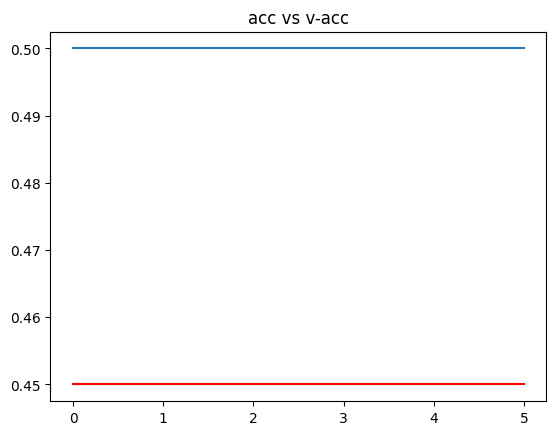

In [53]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title("acc vs v-acc")
plt.show()

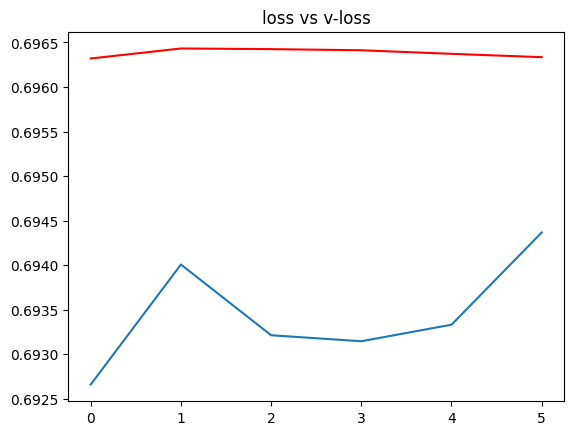

In [54]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title("loss vs v-loss")
plt.show()

In [55]:
#Model Accuracy
from keras.models import load_model
model=load_model("/content/bestmodel.keras")

Model Accuracy

In [57]:
acc=model.evaluate(test_data)[1]
print(f"Our Model Accuracy is {acc*100} %")

1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.3333 - loss: 0.7024
Our Model Accuracy is 33.33333432674408 %


In [58]:
from keras.preprocessing.image import load_img,img_to_array

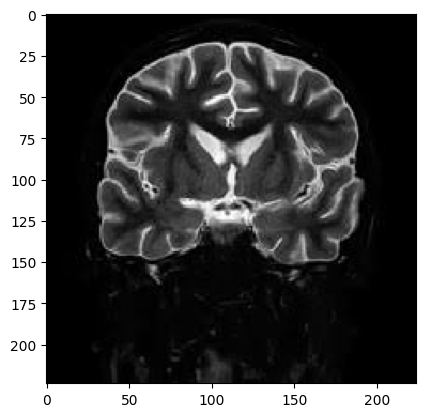

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
the MRI is having a Tumor


In [67]:
import numpy as np
path="/content/brain_tumor_dataset/no/19 no.jpg"
img=load_img(path,target_size=(224,224))
input_arr=img_to_array(img)/255

plt.imshow(input_arr)
plt.show()

input_arr.shape

input_arr=np.expand_dims(input_arr,axis=0)

pred = np.argmax(model.predict(input_arr),axis=-1)[0]
#pred

if pred==0:
  print("the MRI is having a Tumor")
else:
  print("the MRI is not having a Tumor")

In [65]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_data=ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)
train_data=train_data.flow_from_directory(
    directory="/content/train",
    target_size=(224,224),
    batch_size=32,
    class_mode="binary"
)
train_data.class_indices

Found 166 images belonging to 2 classes.


{'no': 0, 'yes': 1}